In [2]:
import numpy as np
import pandas as pd

In [125]:
df = pd.read_pickle('data/final_dataframe.pkl')
df_solar_pred = pd.read_pickle('data/solar_predictions.pkl')

In [178]:
df_load = df[['Date','Total (grid load) [MWh] Original resolutions']].copy()

In [182]:
df_load.set_index(df_load['Date']).loc['2022-06-07 23:45:00':]

Date                                            2022-06-07 23:45:00
Total (grid load) [MWh] Original resolutions                11732.5
Name: 2022-06-07 23:45:00, dtype: object

In [13]:
df_solar_pred.iloc[0:96,1].values

(96,)

In [38]:
arr = np.array([[2,3,4]])

In [41]:
arr = np.append(arr,np.array([[1,2,3]]),axis=0)

In [42]:
arr

array([[2, 3, 4],
       [1, 2, 3],
       [1, 2, 3]])

In [123]:
df_solar_pred['time'] = df_solar_pred.Date

In [129]:
df_new = df_solar_pred.iloc[0:10,:].copy()

In [130]:
df_new['time'] = df_new.Date

In [136]:
df_new

,Date,output,time
0,2022-06-07 23:45:00,"[-97.35642, -61.52329, -22.698582, -57.128147,...",1
1,2022-06-08 00:00:00,"[-88.75584, -53.629368, -29.295261, -53.03745,...",1
2,2022-06-08 00:15:00,"[-97.62449, -67.186745, -56.567722, -67.912575...",1
3,2022-06-08 00:30:00,"[-123.489845, -100.397194, -99.04954, -98.3857...",1
4,2022-06-08 00:45:00,"[-153.38632, -138.58078, -142.07236, -130.3119...",1
5,2022-06-08 01:00:00,"[-172.66953, -165.39609, -170.77866, -149.5700...",1
6,2022-06-08 01:15:00,"[-176.24765, -175.06406, -180.67783, -151.5079...",1
7,2022-06-08 01:30:00,"[-166.76474, -169.70395, -174.1677, -139.12875...",1
8,2022-06-08 01:45:00,"[-148.64633, -153.61435, -155.68674, -117.5275...",1
9,2022-06-08 02:00:00,"[-127.33689, -132.21762, -131.09116, -93.17295...",1


In [137]:
df_solar_pred.iloc[t:t+96,0].values

array(['2022-06-08T02:00:00.000000000', '2022-06-08T02:15:00.000000000',
       '2022-06-08T02:30:00.000000000', '2022-06-08T02:45:00.000000000',
       '2022-06-08T03:00:00.000000000', '2022-06-08T03:15:00.000000000',
       '2022-06-08T03:30:00.000000000', '2022-06-08T03:45:00.000000000',
       '2022-06-08T04:00:00.000000000', '2022-06-08T04:15:00.000000000',
       '2022-06-08T04:30:00.000000000', '2022-06-08T04:45:00.000000000',
       '2022-06-08T05:00:00.000000000', '2022-06-08T05:15:00.000000000',
       '2022-06-08T05:30:00.000000000', '2022-06-08T05:45:00.000000000',
       '2022-06-08T06:00:00.000000000', '2022-06-08T06:15:00.000000000',
       '2022-06-08T06:30:00.000000000', '2022-06-08T06:45:00.000000000',
       '2022-06-08T07:00:00.000000000', '2022-06-08T07:15:00.000000000',
       '2022-06-08T07:30:00.000000000', '2022-06-08T07:45:00.000000000',
       '2022-06-08T08:00:00.000000000', '2022-06-08T08:15:00.000000000',
       '2022-06-08T08:30:00.000000000', '2022-06-08

In [139]:
for t in range(df_new.shape[0]):
    df_new.iloc[t,2] = [df_solar_pred.iloc[t:t+96,0].values]

ValueError: Must have equal len keys and value when setting with an ndarray

In [183]:
for t in range(10):
    if t == 0:
        result = [[df_solar_pred.iloc[t:t+96,0].values]]
    else:
        result = np.append(result,[[df_solar_pred.iloc[t:t+96,0].values]],axis=0)


In [184]:
result.shape

(10, 1, 96)

In [187]:
result[1]

array([['2022-06-08T00:00:00.000000000', '2022-06-08T00:15:00.000000000',
        '2022-06-08T00:30:00.000000000', '2022-06-08T00:45:00.000000000',
        '2022-06-08T01:00:00.000000000', '2022-06-08T01:15:00.000000000',
        '2022-06-08T01:30:00.000000000', '2022-06-08T01:45:00.000000000',
        '2022-06-08T02:00:00.000000000', '2022-06-08T02:15:00.000000000',
        '2022-06-08T02:30:00.000000000', '2022-06-08T02:45:00.000000000',
        '2022-06-08T03:00:00.000000000', '2022-06-08T03:15:00.000000000',
        '2022-06-08T03:30:00.000000000', '2022-06-08T03:45:00.000000000',
        '2022-06-08T04:00:00.000000000', '2022-06-08T04:15:00.000000000',
        '2022-06-08T04:30:00.000000000', '2022-06-08T04:45:00.000000000',
        '2022-06-08T05:00:00.000000000', '2022-06-08T05:15:00.000000000',
        '2022-06-08T05:30:00.000000000', '2022-06-08T05:45:00.000000000',
        '2022-06-08T06:00:00.000000000', '2022-06-08T06:15:00.000000000',
        '2022-06-08T06:30:00.000000000

In [188]:
for t in range(10):
    if t == 0:
        result2 = [[df_solar_pred.iloc[t,1]]]
    else:
        result2 = np.append(result2,[[df_solar_pred.iloc[t,1]]],axis=0)


In [189]:
result2[0]

array([[-9.73564224e+01, -6.15232887e+01, -2.26985817e+01,
        -5.71281471e+01, -3.45400124e+01, -5.16708851e+00,
        -5.71408558e+00, -8.43552113e+00,  2.15317039e+01,
         7.38009167e+00,  5.04554710e+01, -2.63864613e+00,
         2.07827282e+00, -1.08807116e+01,  3.59718895e+01,
         1.07482557e+01,  6.53291855e+01,  9.83409042e+01,
         1.15823021e+02,  1.61994843e+02,  1.72549774e+02,
         2.52167633e+02,  3.11160126e+02,  3.77890656e+02,
         4.97359528e+02,  5.38814514e+02,  7.20970642e+02,
         8.65212158e+02,  9.54431213e+02,  1.12026013e+03,
         1.26895959e+03,  1.47188574e+03,  1.69101306e+03,
         1.85419165e+03,  2.08908813e+03,  2.28470801e+03,
         2.49905713e+03,  2.67516992e+03,  2.87932227e+03,
         3.16325098e+03,  3.29921411e+03,  3.51615601e+03,
         3.69814526e+03,  3.85942432e+03,  4.08274927e+03,
         4.28117041e+03,  4.39941406e+03,  4.49132764e+03,
         4.56079443e+03,  4.66417188e+03,  4.73892529e+0

In [169]:
import numpy as np

# Assuming you have a np.datetime64 object
datetime_obj = np.datetime64('2023-07-13T14:30:00')

# Extracting the hour and minutes
hour = datetime_obj.astype('datetime64[h]').astype(int) % 24
minutes = datetime_obj.astype('datetime64[m]').astype(int) % 60

print("Hour:", hour)
print("Minutes:", minutes)


Hour: 14
Minutes: 30


In [172]:
f'{result[0][0][0].astype("datetime64[h]").astype(int) % 24}:{result[0][0][0].astype("datetime64[m]").astype(int) % 60}'

'23:45'

In [173]:
number = 5

# Displaying the number with two digits
formatted_number = f"{number:02}"

print(formatted_number)


05


In [146]:
import matplotlib.pyplot as plt

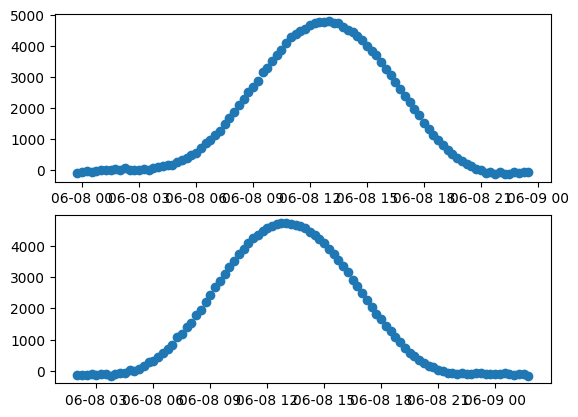

In [156]:
fig, ax = plt.subplots(2)
ax[0].scatter(x=result[0][0],y=result2[0][0])
ax[1].scatter(x=result[9][0],y=result2[9][0])

In [106]:
[df_solar_pred.iloc[0,1]].shape

AttributeError: 'list' object has no attribute 'shape'

In [71]:
pd.DataFrame(result)

ValueError: Must pass 2-d input. shape=(10, 1, 96)

In [140]:
d = {0:{0:9,1:8,2:7,3:8,4:9},1:{1:8,2:7,3:8,4:9,5:8},2:{2:7,3:8,4:9,5:8,6:7}}

In [141]:
pd.DataFrame(d)

,0,1,2
0,9.0,NaN,NaN
1,8.0,8.0,NaN
2,7.0,7.0,7.0
3,8.0,8.0,8.0
4,9.0,9.0,9.0
5,NaN,8.0,8.0
6,NaN,NaN,7.0
